In [1]:
import hist
import numpy as np
import os

#from hist import rebin
import sys
sys.path.append("../../../tools")  # relative to current file


from plotting.twod_eta_pt_eff import make_eff_hists, two_d_delta_eff_err, make_delta_eff_hists, make_2_pt_eff_hists_v3, two_d_eff_err

from effs.eff_hists import two_d_eff_err, calc_eff_err

In [2]:
import cloudpickle

results = {}

var_name = "closure"


# Load files and append results instead of overwriting
files = [
    #f"notebook_v2_DYto2L-2Jets_MLL-50_TuneCP5_13p6TeV_amcatnloFXFX-pythia8_{var_name}_results.pkl",
    f"notebook_v2_DYto2L-4Jets_MLL-50_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v2-v3_{var_name}.pkl",
    #f"notebook_v2_JPsiToEE_pth10toInf_TuneCP5_13p6TeV_pythia8_NANOAODSIM_{var_name}.pkl",
    f"notebook_v2_SlepSnuCascade_MN1-220_MN2-260_MC1-240_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3_{var_name}.pkl",
    #f"notebook_v2_SlepSnuCascade_MN1-260_MN2-280_MC1-270_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3_{var_name}.pkl",
    f"notebook_v2_SlepSnuCascade_MN1-270_MN2-280_MC1-275_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3_{var_name}.pkl",
    f"notebook_v2_TTto2L2Nu_TuneCP5_13p6TeV_powheg-pythia8130X_mcRun3_2023_realistic_v14-v2_{var_name}.pkl",
    f"notebook_v2_WZ_TuneCP5_13p6TeV_pythia8130X_mcRun3_2023_realistic_postBPix_v2-v2_{var_name}.pkl"
]

for file in files:
    with open(file, "rb") as f:
        result = cloudpickle.load(f)
        for key, value in result.items():
            print(key)
            results[key]=value

DYto2L-4Jets_MLL-50_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v2-v3
SlepSnuCascade_MN1-220_MN2-260_MC1-240_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3
SlepSnuCascade_MN1-270_MN2-280_MC1-275_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3
TTto2L2Nu_TuneCP5_13p6TeV_powheg-pythia8130X_mcRun3_2023_realistic_v14-v2
WZ_TuneCP5_13p6TeV_pythia8130X_mcRun3_2023_realistic_postBPix_v2-v2


In [3]:
list(results.keys())

['DYto2L-4Jets_MLL-50_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v2-v3',
 'SlepSnuCascade_MN1-220_MN2-260_MC1-240_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3',
 'SlepSnuCascade_MN1-270_MN2-280_MC1-275_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3',
 'TTto2L2Nu_TuneCP5_13p6TeV_powheg-pythia8130X_mcRun3_2023_realistic_v14-v2',
 'WZ_TuneCP5_13p6TeV_pythia8130X_mcRun3_2023_realistic_postBPix_v2-v2']

In [4]:
i = 0

r = results[list(results.keys())[i]]

r.keys()

dict_keys(['total_entries', 'hists'])

In [5]:
r['hists']

{'barrel_1': {'isBaseline': {'isSignal': Hist(Variable([2, 3, 4, 5, 7, 8, 10, 15, 20, 30, 45, 60, 75, 500], name='isBaseline_isSignal ele $p_T$ (GeV'), storage=Double()) # Sum: 381573.0 (381579.0 with flow),
   'isLightFake': Hist(Variable([2, 3, 4, 5, 7, 8, 10, 15, 20, 30, 45, 60, 75, 500], name='isBaseline_isLightFake ele $p_T$ (GeV'), storage=Double()) # Sum: 15729.0,
   'isHeavyFake': Hist(Variable([2, 3, 4, 5, 7, 8, 10, 15, 20, 30, 45, 60, 75, 500], name='isBaseline_isHeavyFake ele $p_T$ (GeV'), storage=Double()) # Sum: 3001.0,
   'isTauFake': Hist(Variable([2, 3, 4, 5, 7, 8, 10, 15, 20, 30, 45, 60, 75, 500], name='isBaseline_isTauFake ele $p_T$ (GeV'), storage=Double()) # Sum: 39279.0},
  'bl_ID': {'isSignal': Hist(Variable([2, 3, 4, 5, 7, 8, 10, 15, 20, 30, 45, 60, 75, 500], name='bl_ID_isSignal ele $p_T$ (GeV'), storage=Double()) # Sum: 30437.0,
   'isLightFake': Hist(Variable([2, 3, 4, 5, 7, 8, 10, 15, 20, 30, 45, 60, 75, 500], name='bl_ID_isLightFake ele $p_T$ (GeV'), storage

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep
mplhep.style.use(mplhep.style.CMS)
plt.figure()
mplhep.style.use(mplhep.style.CMS)

<Figure size 1000x1000 with 0 Axes>

In [72]:

def make_1d_eff_plot(eff_err, pt_bins, title="Default title", label="test"):
    fig, ax = plt.subplots(figsize=(20, 12))
    
    data = eff_err[0]
    errs = eff_err[1]
    
    #pt_bins = [2,3,4,5,7,8,10,15,20,30,45,60,75,500]
    
    str_names = [str(num) for num in range(len(pt_bins))]
    
    xs = range(len(data))
    #x = np.arange(len(data)) #literally don't see the advantage to using this, range works just fine
    
    ax.errorbar(
        xs, data,
        xerr=0.5,
        fmt='o',
        #capsize=10,
        elinewidth=2,
        color="black",
        label=label
    )

    ax.errorbar(
        xs, data,
        yerr=errs,
        fmt='none', #if you would like no point, just the error bar
        capsize=10,
        elinewidth=2,
        color="black"
    )
    
    edge_ticks = np.arange(-0.5, len(data)+0.5)
    #ax.set_xticks([i + 1 for i in x]) #no longer needed for step if I use where='mid'
    ax.set_xticks(edge_ticks)
    ax.set_xticklabels([str(n) for n in pt_bins])
    ax.set_title(title, pad=20, fontweight="bold")
    
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    
    ax.xaxis.grid(True, which='major', linestyle='--', alpha=0.5)
    ax.legend()
    
    ax.set_xlabel("$p_T$ (GeV)")
    ax.set_ylabel("Efficiency")

    ax.axhline(y=0, linewidth=1, linestyle='--', color='0.5')  # dashed grey
    ax.axhline(y=1, linewidth=1, linestyle='--', color='0.5')  # dashed grey

    ax.set_ylim(-0.1, 1.1)
    
    #fig.show()
    
    return

In [127]:
def make_1d_eff_plot_v2(eff_errs, pt_bins, title="Default title", label=labels, ymin=-0.1, ymax=1.1):

    fig, ax = plt.subplots(figsize=(20, 12))
    
    
    
    #pt_bins = [2,3,4,5,7,8,10,15,20,30,45,60,75,500]
    
    str_names = [str(num) for num in range(len(pt_bins))]
    
    colors = [
    #'black', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive',
    'cyan', 'magenta', 'lime', 'teal', 'navy', 'maroon', 'coral', 'gold', 'indigo', 'violet',
    'turquoise', 'crimson', 'chocolate', 'darkgreen', 'darkblue', 'darkred', 'darkorange',
    'darkviolet', 'darkcyan', 'darkmagenta', 'darkgray', 'lightgray', 'lightblue', 'lightgreen',
    'lightcoral', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightsteelblue',
    'mediumblue', 'mediumseagreen', 'mediumslateblue', 'mediumturquoise', 'mediumvioletred',
    'midnightblue', 'orangered', 'orchid', 'palegreen', 'paleturquoise', 'palevioletred',
    'peru', 'plum', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown',
    'seagreen', 'sienna', 'skyblue', 'slateblue', 'springgreen', 'steelblue', 'tan', 'tomato'
    ]
    #x = np.arange(len(data)) #literally don't see the advantage to using this, range works just fine


    for i, eff_err in enumerate(eff_errs):
        data = eff_err[0]
        errs = eff_err[1]
        #xs = range(len(data))
        xs = np.arange(len(data))
        
        ax.errorbar(
            xs, data,
            xerr=0.5,
            fmt='o',
            #capsize=10,
            elinewidth=3,
            color=colors[i],
            label=labels[i]
        )
    
        ax.errorbar(
            xs, data,
            yerr=errs,
            fmt='none', #if you would like no point, just the error bar
            capsize=10,
            elinewidth=3,
            color=colors[i]
        )
    
    edge_ticks = np.arange(-0.5, len(data)+0.5)
    #ax.set_xticks([i + 1 for i in x]) #no longer needed for step if I use where='mid'
    ax.set_xticks(edge_ticks)
    ax.set_xticklabels([str(n) for n in pt_bins])
    ax.set_title(title, pad=20, fontweight="bold")
    
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    
    ax.xaxis.grid(True, which='major', linestyle='--', alpha=0.5)
    ax.legend()
    
    ax.set_xlabel("$p_T$ (GeV)")
    ax.set_ylabel("Efficiency")

    ax.axhline(y=0, linewidth=1, linestyle='--', color='0.5')  # dashed grey
    ax.axhline(y=1, linewidth=1, linestyle='--', color='0.5')  # dashed grey

    ax.set_ylim(ymin, ymax)
    #ax.set_xlim(ymin, ymax)
    
    fig.show()
    

In [125]:
sample_keys = results.keys()
sample_keys

dict_keys(['DYto2L-4Jets_MLL-50_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v2-v3', 'SlepSnuCascade_MN1-220_MN2-260_MC1-240_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3', 'SlepSnuCascade_MN1-270_MN2-280_MC1-275_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3', 'TTto2L2Nu_TuneCP5_13p6TeV_powheg-pythia8130X_mcRun3_2023_realistic_v14-v2', 'WZ_TuneCP5_13p6TeV_pythia8130X_mcRun3_2023_realistic_postBPix_v2-v2'])

In [37]:
['barrel_1', 'barrel_2', '2d_pt_eta']

['barrel_1', 'barrel_2', '2d_pt_eta']

In [55]:
ele_pt_bins = [2,3,4,5,7,8,10,15,20,30,45,60,75,500]

In [38]:


for key in sample_keys:
    barrel_1_hists = results[key]['hists']['barrel_1']
    print(barrel_1_hists.keys())
    for qual_key, hist_dict in barrel_1_hists.items():
        
        make_1d_eff_plot(barrel_1_hists[qual_key][gen_key])
    
    
    

dict_keys(['isBaseline', 'bl_ID', 'bl_ID_Iso', 'bl_ID_Iso_SIP3D', 'isGold', 'isSilver'])
dict_keys(['isBaseline', 'bl_ID', 'bl_ID_Iso', 'bl_ID_Iso_SIP3D', 'isGold', 'isSilver'])
dict_keys(['isBaseline', 'bl_ID', 'bl_ID_Iso', 'bl_ID_Iso_SIP3D', 'isGold', 'isSilver'])
dict_keys(['isBaseline', 'bl_ID', 'bl_ID_Iso', 'bl_ID_Iso_SIP3D', 'isGold', 'isSilver'])
dict_keys(['isBaseline', 'bl_ID', 'bl_ID_Iso', 'bl_ID_Iso_SIP3D', 'isGold', 'isSilver'])


In [66]:
sample_key = 'DYto2L-4Jets_MLL-50_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v2-v3'
test_res = results[sample_key]

In [45]:
test_res['hists']['barrel_1'].keys()

dict_keys(['isBaseline', 'bl_ID', 'bl_ID_Iso', 'bl_ID_Iso_SIP3D', 'isGold', 'isSilver'])

In [47]:
barrel_1 = test_res['hists']['barrel_1']

In [61]:

pairs = [('bl_ID','isBaseline')]

In [62]:
for pair in pairs:
    temp = calc_eff_err(barrel_1[pair[0]][gen_key],barrel_1[pair[1]][gen_key])

In [63]:
temp

(array([0.5       , 0.68617021, 0.72857143, 0.75819209, 0.73626374,
        0.83244963, 0.90411376, 0.93249798, 0.        , 0.        ,
        0.        , 0.        , 0.        ]),
 array([0.05812382, 0.03384419, 0.02657571, 0.01439306, 0.0174595 ,
        0.00859965, 0.00296744, 0.00178335, 0.        , 0.        ,
        0.        , 0.        , 0.        ]))

# Barrel 1

/home/cms-jovyan/dwg_analysis_v4/analysis/notebooks/fri_sep_5th/../../../tools/effs/eff_hists.py:122: RuntimeWarning: divide by zero encountered in divide
  eff = num/denom
/home/cms-jovyan/dwg_analysis_v4/analysis/notebooks/fri_sep_5th/../../../tools/effs/eff_hists.py:123: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(eff * (1 - eff)/ denom)


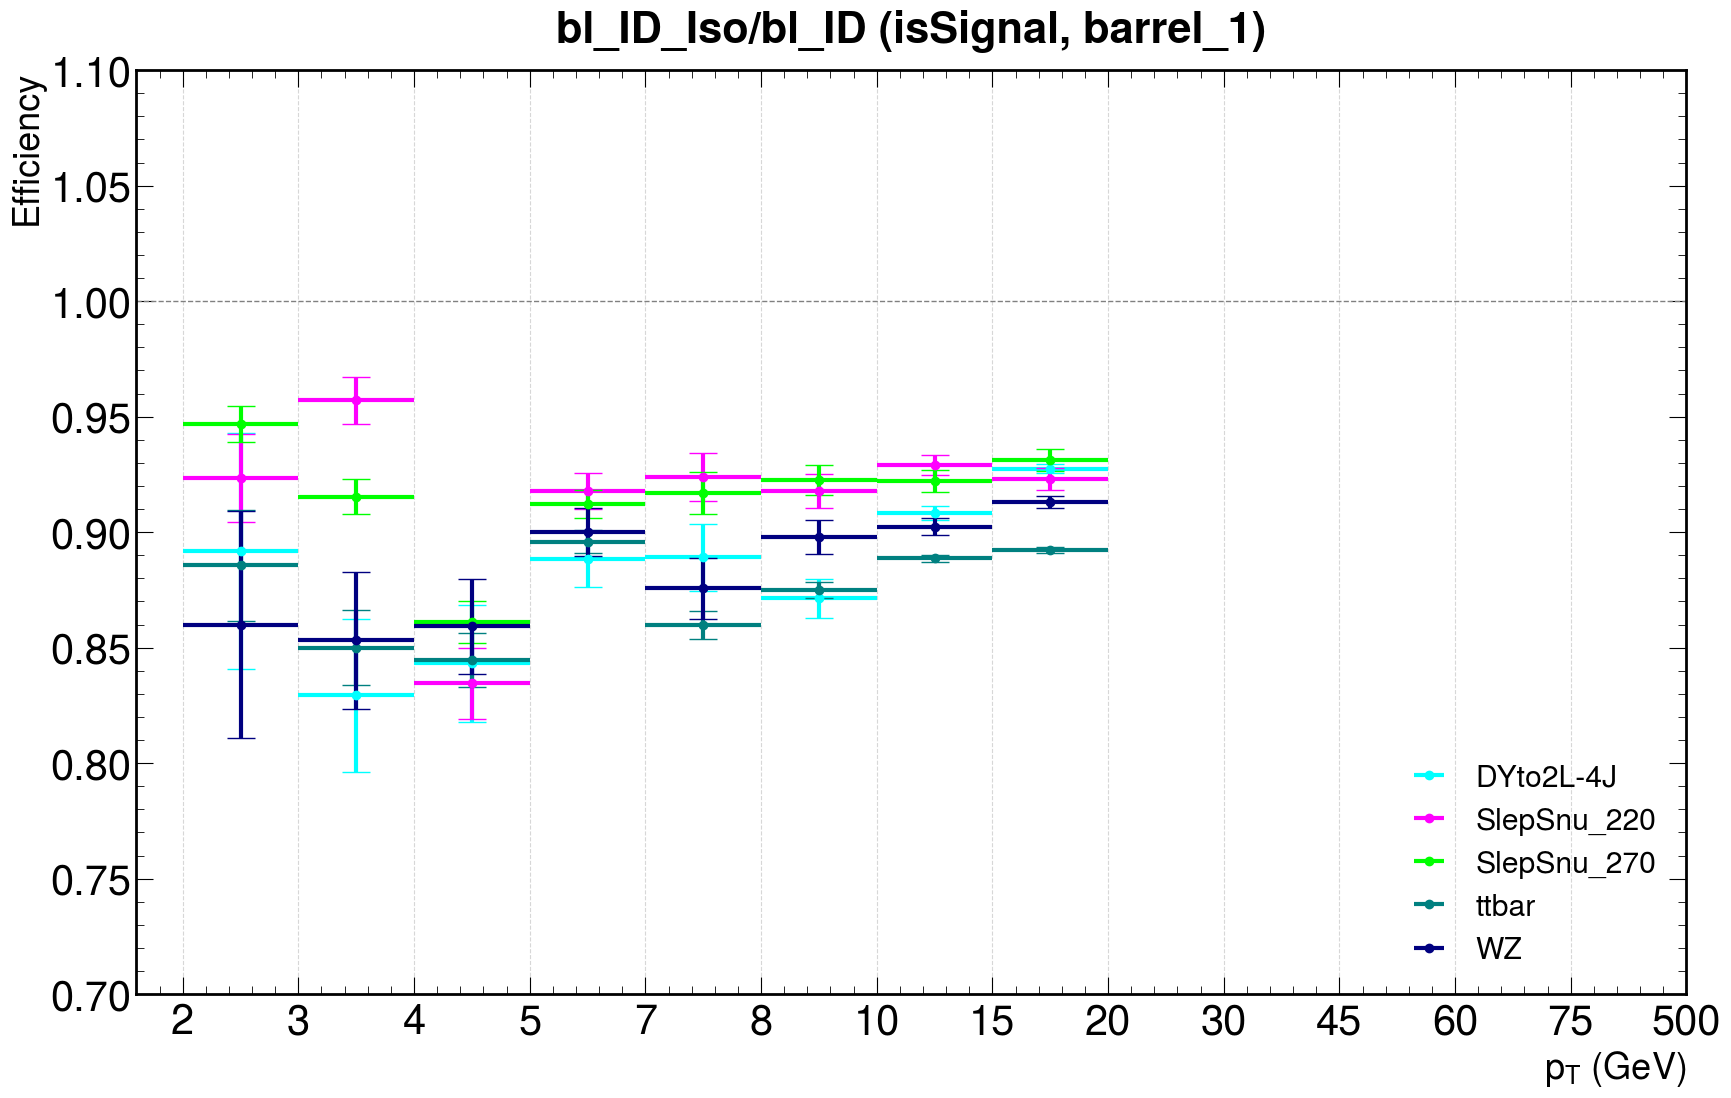

In [128]:
sample_keys = {
    'DYto2L-4Jets_MLL-50_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v2-v3': "DYto2L-4J",
    'SlepSnuCascade_MN1-220_MN2-260_MC1-240_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3': 'SlepSnu_220',
    'SlepSnuCascade_MN1-270_MN2-280_MC1-275_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3': 'SlepSnu_270',
    'TTto2L2Nu_TuneCP5_13p6TeV_powheg-pythia8130X_mcRun3_2023_realistic_v14-v2': "ttbar",
    'WZ_TuneCP5_13p6TeV_pythia8130X_mcRun3_2023_realistic_postBPix_v2-v2': 'WZ'
}

labels = list(sample_keys.values())

ele_pt_bins = [2,3,4,5,7,8,10,15,20,30,45,60,75,500]

#pairs = [('bl_ID','isBaseline'), ('bl_ID_Iso', 'bl_ID')]
#pairs = [('bl_ID','isBaseline')]
pairs = [('bl_ID_Iso','bl_ID')]

gen_key = 'isSignal'

barrel_type = 'barrel_1'

eff_errs = []

for pair in pairs:
    for sample_key in results.keys():

        barrel_hists = results[sample_key]['hists'][barrel_type]
        
        hist_1=barrel_hists[pair[0]][gen_key]
        hist_2=barrel_hists[pair[1]][gen_key]
        
        temp_eff_err = calc_eff_err(hist_1,hist_2)
        eff_errs.append(temp_eff_err)
    
    make_1d_eff_plot_v2(eff_errs, ele_pt_bins, title=f"{pair[0]}/{pair[1]} ({gen_key}, {barrel_type})", label=labels, ymin=0.7)
    


# Barrel 2

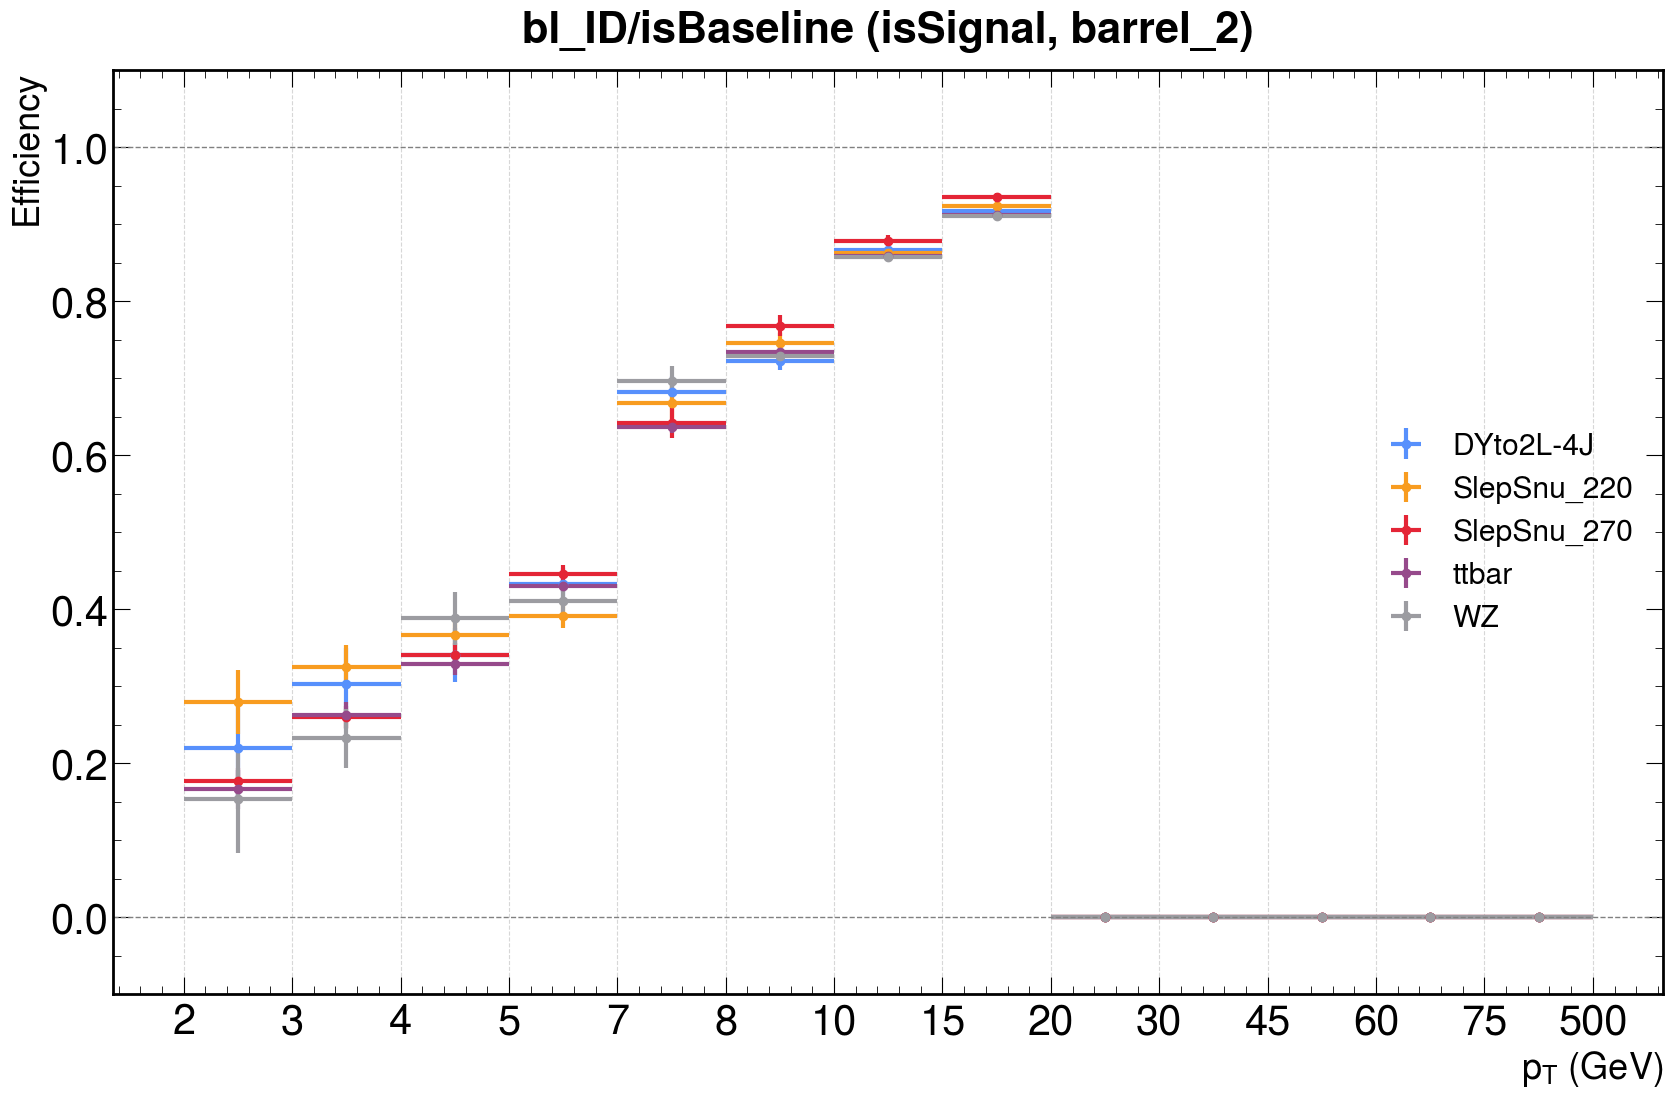

In [119]:
sample_keys = {
    'DYto2L-4Jets_MLL-50_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v2-v3': "DYto2L-4J",
    'SlepSnuCascade_MN1-220_MN2-260_MC1-240_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3': 'SlepSnu_220',
    'SlepSnuCascade_MN1-270_MN2-280_MC1-275_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3': 'SlepSnu_270',
    'TTto2L2Nu_TuneCP5_13p6TeV_powheg-pythia8130X_mcRun3_2023_realistic_v14-v2': "ttbar",
    'WZ_TuneCP5_13p6TeV_pythia8130X_mcRun3_2023_realistic_postBPix_v2-v2': 'WZ'
}

ele_pt_bins = [2,3,4,5,7,8,10,15,20,30,45,60,75,500]

#pairs = [('bl_ID','isBaseline'), ('bl_ID_Iso', 'bl_ID')]
pairs = [('bl_ID','isBaseline')]

gen_key = 'isSignal'

barrel_type = 'barrel_2'

eff_errs = []

labels = list(sample_keys.values())

for pair in pairs:
    for sample_key in results.keys():

        barrel_hists = results[sample_key]['hists'][barrel_type]
        
        hist_1=barrel_hists[pair[0]][gen_key]
        hist_2=barrel_hists[pair[1]][gen_key]
        
        temp_eff_err = calc_eff_err(hist_1,hist_2)
        eff_errs.append(temp_eff_err)
    
    make_1d_eff_plot_v2(eff_errs, ele_pt_bins, title=f"{pair[0]}/{pair[1]} ({gen_key}, {barrel_type})", label=labels)
    